In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Funcoes uteis

In [284]:
def dict_dtypes(df):
    g = df.columns.to_series().groupby(df.dtypes).groups
    dict_dtypes = {k.name: v for k, v in g.items()}
    return dict_dtypes

def count_columns_nans(df,column):
    return df[column].isna().sum()

def count_columns_zeros(df,column):
    return df[df[column]==0][column].count()

def count_columns_uniques(df,column):
    return df[column].nunique()

def list_columns_dtypes(df):
    print(df.dtypes.reset_index())
    
def df_report_lenta(df):
    dfs = []
    for column in df.columns:
        df_temp = pd.DataFrame({'dtype':  [df[column].dtype],
        'count_nans': [count_columns_nans(df,column)],
        'count_zeros': [count_columns_zeros(df,column)],
        'count_uniques':[count_columns_nuniques(df,column)]})
        dfs.append(df_temp)
    df_report = pd.concat(dfs)
    return df_report

def df_report(df,tipo):
    keyList = ['column','dtype','count_nans','count_zeros','count_uniques'] 
    dict_results = {key: [] for key in keyList} 
    for column in df.columns:
        dict_results['column'].append(column)
        dict_results['dtype'].append(df[column].dtype)
        dict_results['count_nans'].append(count_columns_nans(df,column))
        dict_results['count_zeros'].append(count_columns_zeros(df,column))
        dict_results['count_uniques'].append(count_columns_uniques(df,column))
    df_result = pd.DataFrame.from_dict(dict_results)
    df_result['percent_nans'] = (df_result['count_nans']/df.ClientId.count())*100
    df_result['percent_zeros'] = (df_result['count_zeros']/df.ClientId.count())*100
    df_result.to_excel('../Reports/2_Analise_Exploratoria/df_report_{0}.xlsx'.format(tipo))
    return df_result.values

def get_employee(x):
    if pd.isna(x):
        return 0
    else:
        return 1
    
def draw_histograms(df, variaveis, n_linhas, n_cols):
    fig=plt.figure(figsize=(16,12))
    for i, var_name in enumerate(variaveis):
        ax=fig.add_subplot(n_linhas,n_cols,i+1)
        df[(df[var_name]>0)&(df[var_name]<=10000)][var_name].hist(bins=30,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()
    plt.show()

def draw_histograms_by_target(df, variaveis, lim_sup, n_linhas, n_cols):
    fig=plt.figure(figsize=(16,12))
    for i, var_name in enumerate(variaveis):
        ax=fig.add_subplot(n_linhas,n_cols,i+1)
        df[(df.EVER60==0)&(df[var_name]>0)&(df[var_name]<=lim_sup)][var_name].hist(density=False, bins=30,ax=ax, alpha=0.8, color='tab:blue')
        df[(df.EVER60==1)&(df[var_name]>0)&(df[var_name]<=lim_sup)][var_name].hist(density=False, bins=30,ax=ax, alpha=1, color='tab:red')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()
    plt.show()
    

def draw_histograms_by_target_ints(df, variaveis, lim_sup, n_linhas, n_cols):
    fig=plt.figure(figsize=(16,12))
    for i, var_name in enumerate(variaveis):
        ax=fig.add_subplot(n_linhas,n_cols,i+1)
        df[(df.EVER60==0)&(df[var_name]>0)&(df[var_name]<=lim_sup)][var_name].hist(density=False, bins=20,ax=ax, alpha=0.8, color='tab:blue')
        df[(df.EVER60==1)&(df[var_name]>0)&(df[var_name]<=lim_sup)][var_name].hist(density=False, bins=20,ax=ax, alpha=1, color='tab:red')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()
    plt.show()

# 1. Load Data

In [447]:
# PUBLICO
df_publico = pd.read_csv('../data/interim/publico_modelo_bhv.csv')
df_publico = df_publico[['CLIENTID', 'M0','EVER60']]
df_publico.dropna(subset=['CLIENTID'], inplace = True)
df_publico['CLIENTID'] = df_publico['CLIENTID'].astype(str)
publico  = df_publico['CLIENTID'].unique()

In [448]:
column_values = df_publico[['CLIENTID','M0']].values
len(column_values)

599238

In [261]:
# TRANSACIONAIS
df1_transacionais = pd.read_csv('../data/raw/m0_maio/variaveis_transacionais.csv')
df2_transacionais = pd.read_csv('../data/raw/m0_junho/variaveis_transacionais.csv')
df3_transacionais = pd.read_csv('../data/raw/m0_julho/variaveis_transacionais.csv')
df4_transacionais = pd.read_csv('../data/raw/m0_agosto/variaveis_transacionais.csv')
df5_transacionais = pd.read_csv('../data/raw/m0_setembro/variaveis_transacionais.csv')

df_transacionais = pd.concat([df1_transacionais, df2_transacionais, df3_transacionais, df4_transacionais, df5_transacionais])
df_transacionais['ClientId'] = df_transacionais['ClientId'].astype(str)
df_transacionais = df_transacionais[df_transacionais['ClientId'].isin(publico)]


In [427]:
## CADASTRAIS
df_cadastrais = pd.read_csv('../data/raw/variaveis_bureau.csv')
df_cadastrais.dropna(subset=['ClientId'], inplace = True)
df_cadastrais['ClientId'] = df_cadastrais['ClientId'].astype(str)
df_cadastrais = df_cadastrais[df_cadastrais['ClientId'].isin(publico)]

In [325]:
## ATRASOS
df1_atrasos = pd.read_csv('../data/raw/m0_maio/variaveis_atrasos.csv')
df1_atrasos['m0'] = 'mai'
df2_atrasos = pd.read_csv('../data/raw/m0_junho/variaveis_atrasos.csv')
df2_atrasos['m0'] = 'jun'
df3_atrasos = pd.read_csv('../data/raw/m0_julho/variaveis_atrasos.csv')
df3_atrasos['m0'] = 'jul'
df4_atrasos = pd.read_csv('../data/raw/m0_agosto/variaveis_atrasos.csv')
df4_atrasos['m0'] = 'ago'
df5_atrasos = pd.read_csv('../data/raw/m0_setembro/variaveis_atrasos.csv')
df5_atrasos['m0'] = 'set'
df_atrasos = pd.concat([df1_atrasos, df2_atrasos, df3_atrasos, df4_atrasos, df5_atrasos])

df_atrasos['ClientId'] = df_atrasos['ClientId'].astype(str)
df_atrasos = df_atrasos[df_atrasos['ClientId'].isin(publico)]

In [335]:
## LIMITE E SALDO
df_limite_saldo = pd.read_csv('../data/interim/variaveis_saldo_credito2.csv')
df_limite_saldo['ClientId'] = df_limite_saldo['ClientId'].astype(int)
df_limite_saldo['ClientId'] = df_limite_saldo['ClientId'].astype(str)
df_limite_saldo = df_limite_saldo[df_limite_saldo['ClientId'].isin(publico)]

In [320]:
# len(publico), 
# df_cadastrais.ClientId.nunique(), 
# df_transacionais.ClientId.nunique(),  
# df_atrasos.ClientId.nunique()

In [266]:
df_transacionais.ClientId.count()

567388

# 2. Variáveis Transacionais

In [267]:
df_transacionais.drop(columns = ['DATA_CONTRATACAO_CREDITO',
                   'RANDOM_ID', 
                   'ID_NORM', 
                   'RANDOM_ID_NORM', 
                   'STATUS_CONTA_M0', 
                   'VALOR_ATRASO_MAX_MENOR60D',
                   'VALOR_ATRASO_M0',
                   'VALOR_ATRASO_MAX_EVER60',
                   'LAST_TRANSACTION_DATE', 
                   'IS_NEON_PLUS_AT_THAT_TIME'], inplace=True)

In [268]:
df_report = pd.DataFrame(df_report(df_transacionais, 'transacionais'), columns=['column','dtype','count_nans','count_zeros','count_uniques', 'percent_nans', 'percent_zeros'] )

### Dropando colunas com muitos zeros

In [269]:
PERCENT_ZEROS_ADMITED = 90

In [270]:
columns_float = df_report[(df_report.dtype=='float')&(df_report.percent_zeros<=PERCENT_ZEROS_ADMITED)].column.to_list()
columns_ints = df_report[(df_report.dtype=='int')&(df_report.percent_zeros<=PERCENT_ZEROS_ADMITED)].column.to_list()
columns_object = df_report[df_report.dtype=='object'].column.to_list()

columns_to_keep = columns_object + columns_float + columns_ints

In [271]:
len(columns_float),  len(columns_ints), len(columns_object), len(columns_to_keep)

(31, 21, 2, 54)

In [272]:
df_transacionais = df_transacionais[columns_to_keep]
df_transacionais = df_transacionais.loc[:,~df_transacionais.columns.duplicated()]

In [273]:
len(columns_to_keep), len(df_transacionais.columns)

(54, 54)

#### VALUES

In [274]:
len(columns_float)

31

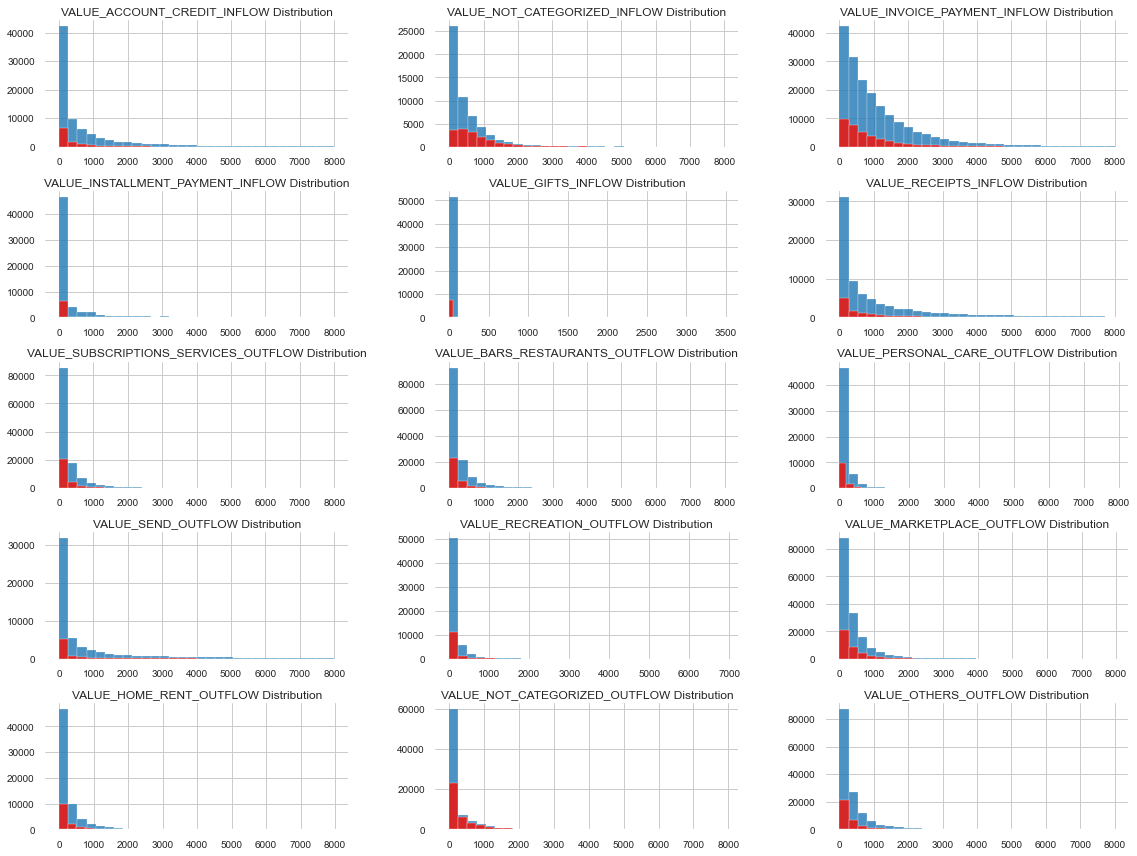

In [275]:
draw_histograms_by_target(df_transacionais, columns_float[0:15], 8000, 5, 3)

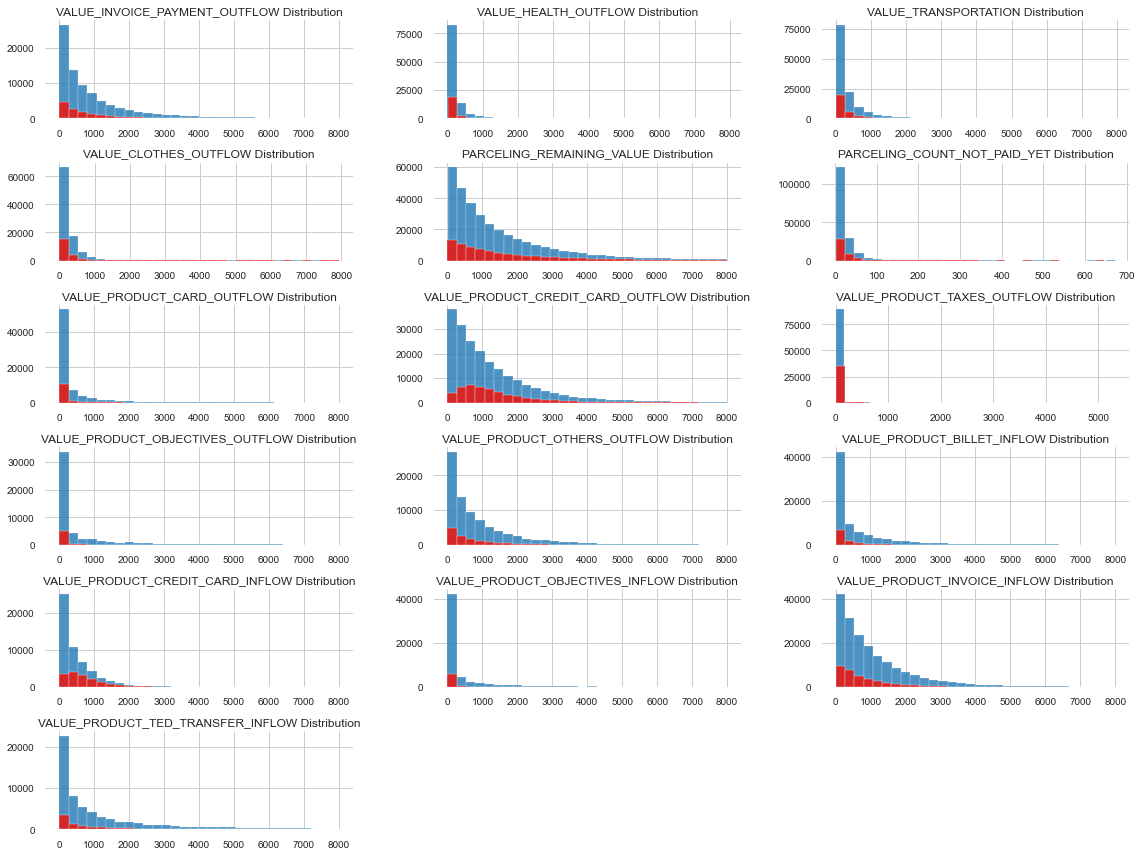

In [276]:
draw_histograms_by_target(df_transacionais, columns_float[15:31], 8000, 6, 3)

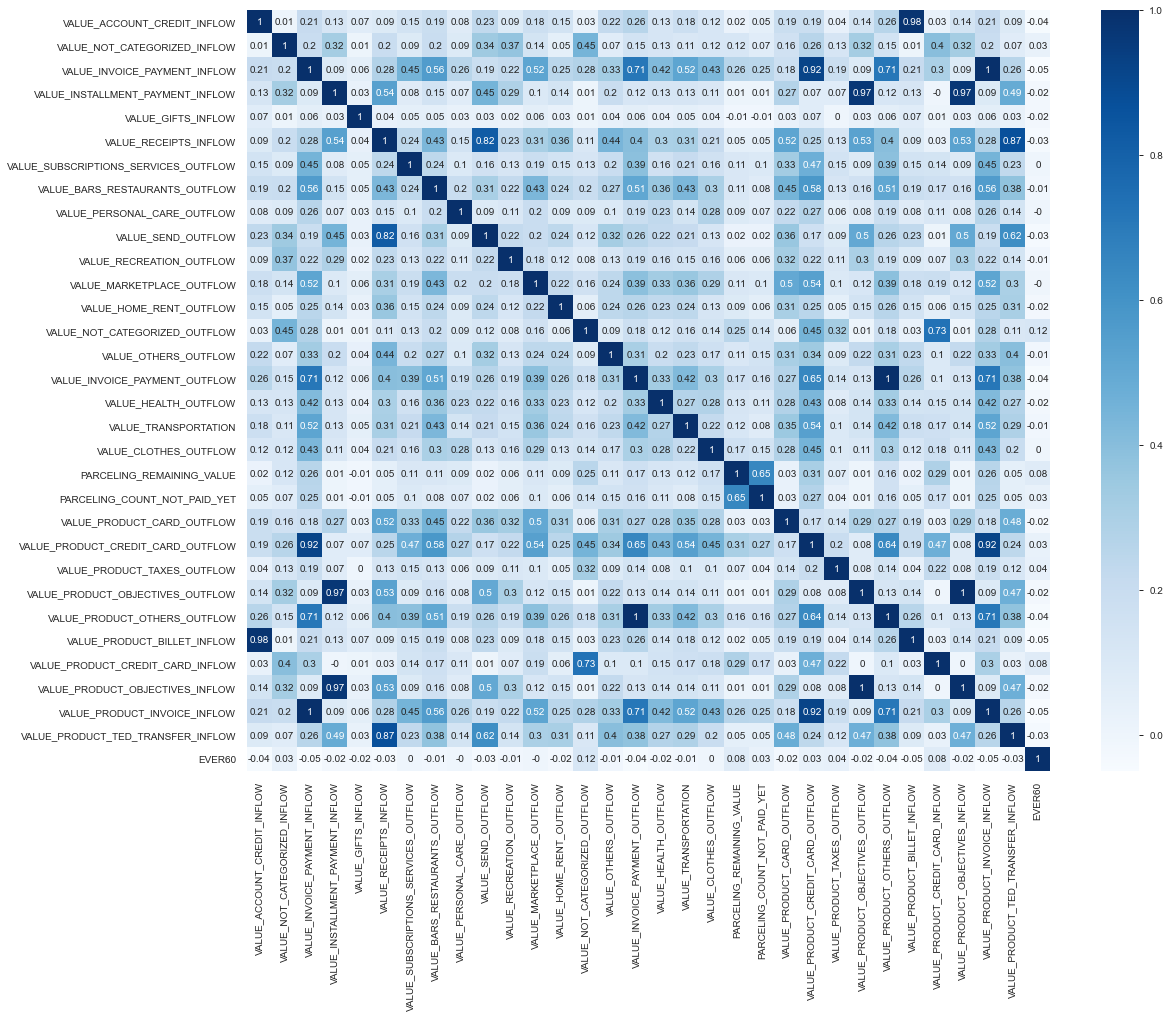

In [277]:
fig = plt.figure(figsize=(18,14))

df_cor = df_transacionais[columns_float+['EVER60']].corr().round(2)
sns.heatmap(df_cor, cmap="Blues",annot=True)

#### COUNTS E FLAGS

In [278]:
len(columns_ints)

21

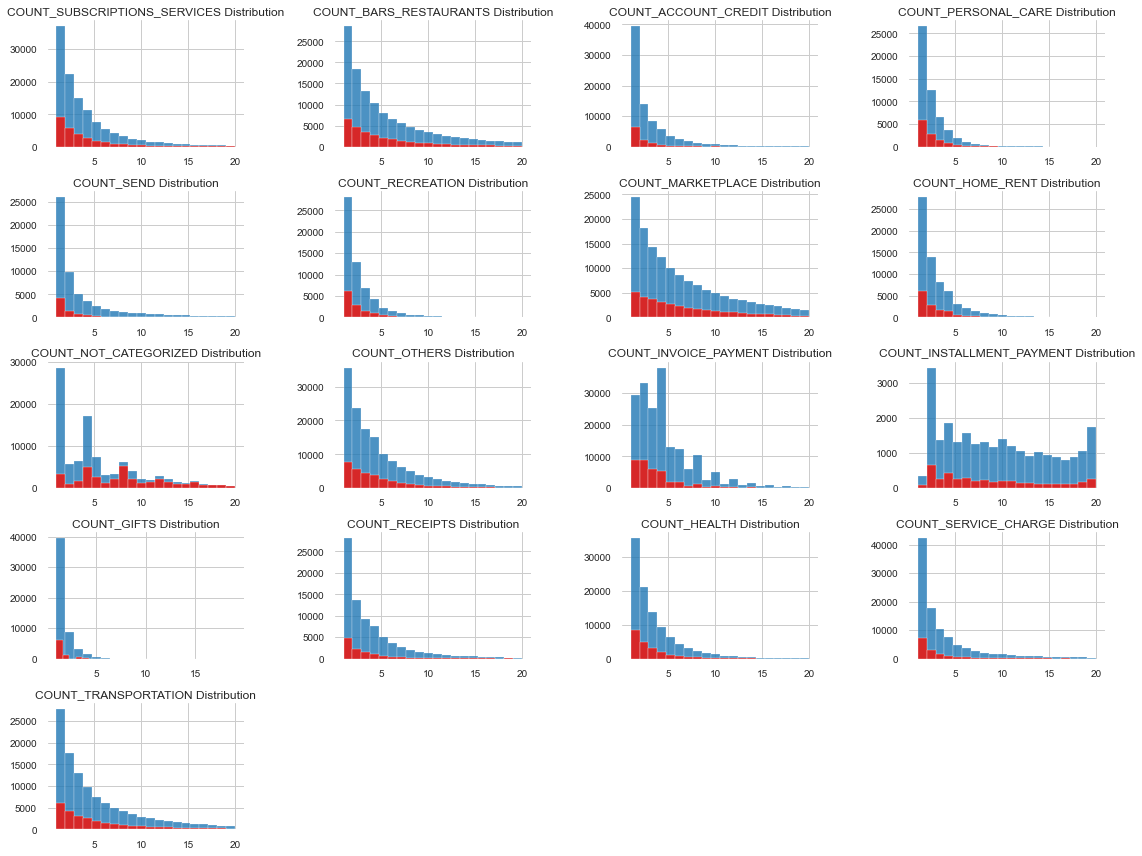

In [279]:
draw_histograms_by_target_ints(df_transacionais, columns_ints[2:19], 20, 5, 4)

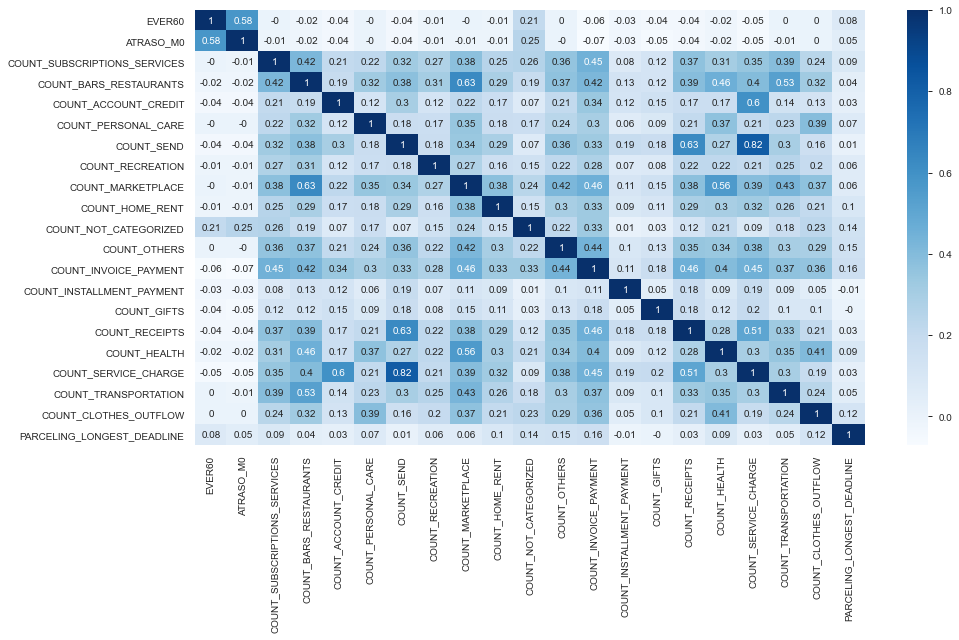

In [280]:
fig = plt.figure(figsize=(15,8))

df_cor = df_transacionais[columns_ints].corr().round(2)
sns.heatmap(df_cor, cmap="Blues",annot=True)

## 3. Variáveis Cadastrais

In [428]:
df_cadastrais['SKProductFirstTransaction'] = df_cadastrais['SKProductFirstTransaction'].astype(str)
df_cadastrais['AdSetId'] = df_cadastrais['AdSetId'].astype(str)
df_cadastrais['AdvertisementId'] = df_cadastrais['AdvertisementId'].astype(str)
df_cadastrais['InvitationOriginCPF_CNPJ'] = df_cadastrais['InvitationOriginCPF_CNPJ'].astype(str)
df_cadastrais['FlagEmployee'] = df_cadastrais['Profissao'].apply(lambda x: get_employee(x))

df_cadastrais['PossuiVeiculo'].fillna(0, inplace = True)
df_cadastrais['PossuiProtesto'].fillna(0, inplace = True)

df_cadastrais['PossuiVeiculo'] = df_cadastrais['PossuiVeiculo'].astype(int)
df_cadastrais['PossuiProtesto'] = df_cadastrais['PossuiProtesto'].astype(int)

In [429]:
df_cadastrais.columns

Index(['ClientId', 'DataAberturaConta', 'DataAtivacaoConta', 'DataNascimento',
       'NeonPlusFirstDate', 'LastTransactionDate', 'AddressNeighborhood',
       'AddressCity', 'AddressState', 'Profissao', 'InstallSource',
       'SKProductFirstTransaction', 'Device', 'Platform', 'OSVersion',
       'CampaignId', 'AdSetId', 'AdvertisementId', 'InvitationOriginCPF_CNPJ',
       'PossuiProtesto', 'PossuiVeiculo', 'FlagInvitedUser', 'FlagActive',
       'FlagCompany', 'FlagEmployee', 'FlagCreditFamilyAndFriends',
       'FlagInvitationUsed', 'ScoreBureau', 'ReceitaBase', 'ReceitaTeto',
       'score', 'Renda', 'DeclaredIncome', 'StartDepositValue'],
      dtype='object')

In [430]:
df_report_cadastrais = pd.DataFrame(df_report(df_cadastrais, 'cadastrais'), columns=['column','dtype','count_nans','count_zeros','count_uniques', 'percent_nans', 'percent_zeros'])

#### Categoricas

In [431]:
df_report_cadastrais[df_report_cadastrais['dtype']=='object'].sort_values(by=['count_nans', 'count_uniques'])

column   dtype count_nans count_zeros count_uniques  \
13                   Platform  object          0           0             2   
11  SKProductFirstTransaction  object          0           0            19   
16                    AdSetId  object          0           0           335   
17            AdvertisementId  object          0           0           743   
18   InvitationOriginCPF_CNPJ  object          0           0         20634   
1           DataAberturaConta  object          0           0        115624   
0                    ClientId  object          0           0        115777   
8                AddressState  object       1565           0            60   
7                 AddressCity  object       1565           0          4744   
6         AddressNeighborhood  object       1565           0         27126   
3              DataNascimento  object       1779           0         16466   
2           DataAtivacaoConta  object       5007           0           493   
5         LastTransactionDate  object       5009           0           487   
4           NeonPlusFirstDate  object       9645           0        106230   
14                  OSVersion  object      11526           0            79   
12                     Device  object      11526           0          1710   
10              InstallSource  object      48604           0            57   
9                   Profissao  object      54230           0          1621   
15                 CampaignId  object      60736           0           105   

   percent_nans percent_zeros  
13            0             0  
11            0             0  
16            0             0  
17            0             0  
18            0             0  
1             0             0  
0             0             0  
8       1.33417             0  
7       1.33417             0  
6       1.33417             0  
3       1.51661             0  
2       4.26851             0  
5       4.27021             0  
4       8.22244             0  
14        9.826             0  
12        9.826             0  
10      41.4353             0  
9       46.2315             0  
15      51.7779             0

columns_to_drop:
- AdressCity: muitos dados, muito tratamento
- AddressNeighborhood: muitos dados, muito tratamento
- Profissao: muitos dados, muito tratamento
- PossuiProtesto: poucos dados, insignificante

columns_to_keep:
Colunas com poucos nans e poucos uniques.

In [432]:
columns_cadastrais_categ = ['ClientId','SKProductFirstTransaction','Platform', 'Device', 'InstallSource', 'AddressState']

#### Numericas

In [433]:
df_report_cadastrais[df_report_cadastrais['dtype']=='int'].sort_values(by=['count_zeros'])

column  dtype count_nans count_zeros count_uniques  \
23                 FlagCompany  int64          0           0             1   
26          FlagInvitationUsed  int64          0        4243             2   
22                  FlagActive  int64          0       30779             2   
24                FlagEmployee  int64          0       54230             2   
21             FlagInvitedUser  int64          0       93650             2   
20               PossuiVeiculo  int64          0      105219             2   
19              PossuiProtesto  int64          0      117301             1   
25  FlagCreditFamilyAndFriends  int64          0      117301             1   

   percent_nans percent_zeros  
23            0             0  
26            0       3.61719  
22            0       26.2393  
24            0       46.2315  
21            0       79.8373  
20            0          89.7  
19            0           100  
25            0           100

In [434]:
columns_cadastrais_int = ['FlagInvitedUser','FlagEmployee', 'PossuiVeiculo']

In [435]:
df_report_cadastrais[df_report_cadastrais['dtype']=='float'].sort_values(by=['count_zeros'])

column    dtype count_nans count_zeros count_uniques  \
32     DeclaredIncome  float64       1712         369          5247   
27        ScoreBureau  float64       1565         403           995   
33  StartDepositValue  float64          0         712             2   
28        ReceitaBase  float64       3062        1173           136   
29        ReceitaTeto  float64       3391        1173           136   
31              Renda  float64       1076        2032         39559   
30              score  float64       2272        3931             7   

   percent_nans percent_zeros  
32      1.45949      0.314575  
27      1.33417      0.343561  
33            0      0.606985  
28      2.61038      0.999991  
29      2.89085      0.999991  
31     0.917298        1.7323  
30       1.9369       3.35121

In [436]:
columns_cadastrais_float = ['DeclaredIncome', 'StartDepositValue', 'ReceitaBase', 'ReceitaTeto', 'Renda']

### Graficos categoricas

In [437]:
df_cadastrais = df_cadastrais[columns_cadastrais_categ + columns_cadastrais_int + columns_cadastrais_float]
df_transacionais['ClientId'] = df_transacionais['ClientId'].astype(str)

df_cadastrais = df_publico.merge(df_cadastrais, how='left', left_on = 'CLIENTID' , right_on='ClientId')

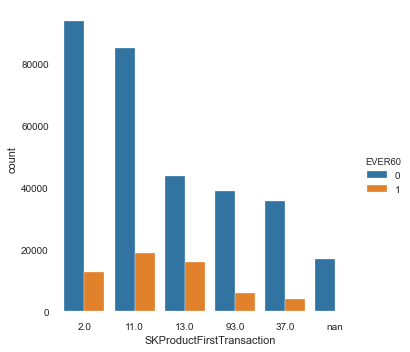

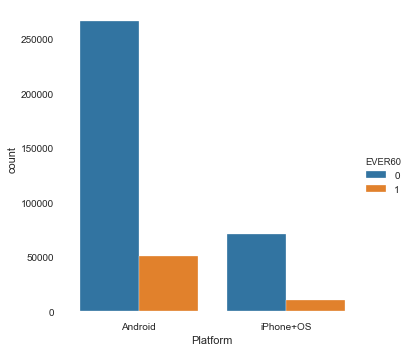

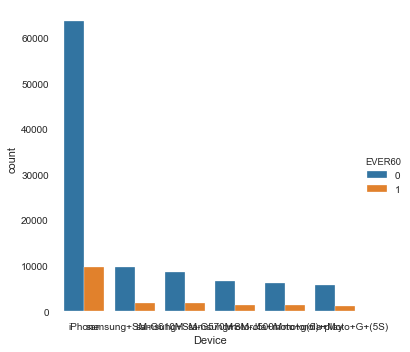

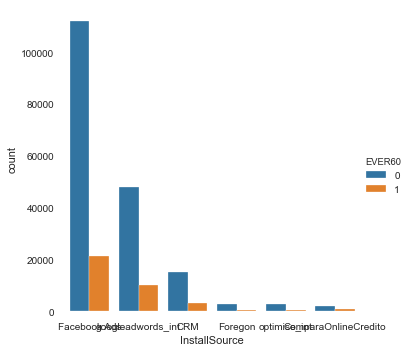

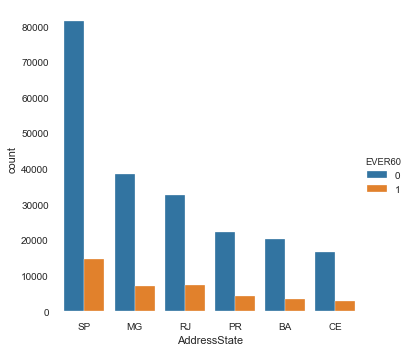

In [438]:
sns.catplot(x="SKProductFirstTransaction", kind="count", data = df_cadastrais, order=df_cadastrais.SKProductFirstTransaction.value_counts().iloc[:6].index, hue='EVER60')
sns.catplot(x="Platform", kind="count", data = df_cadastrais, order=df_cadastrais.Platform.value_counts().iloc[:6].index, hue='EVER60')
sns.catplot(x="Device", kind="count", data = df_cadastrais, order=df_cadastrais.Device.value_counts().iloc[:6].index, hue='EVER60')
sns.catplot(x="InstallSource", kind="count", data = df_cadastrais, order=df_cadastrais.InstallSource.value_counts().iloc[:6].index, hue='EVER60')
sns.catplot(x="AddressState", kind="count", data = df_cadastrais, order=df_cadastrais.AddressState.value_counts().iloc[:6].index, hue='EVER60')

## 4. Variaveis de Atraso

In [327]:
df_atrasos.columns

Index(['ClientId', 'DataReferencia_1', 'Atraso_1', 'Data1Fatura_1',
       'NumeroFatura_1', 'DataReferencia_2', 'Atraso_2', 'Data1Fatura_2',
       'NumeroFatura_2', 'DataReferencia_3', 'Atraso_3', 'DataFatura_3',
       'NumeroFatura_3', 'DataReferencia_4', 'Atraso_4', 'DataFatura_4',
       'NumeroFatura_4', 'm0'],
      dtype='object')

In [328]:
df_atrasos = df_publico[['CLIENTID', 'EVER60']].merge(df_atrasos, how='left', left_on = 'CLIENTID' , right_on='ClientId')

In [329]:
df_atrasos.Atraso_2.unique()

array([  0.,   5.,  nan,  36.,  97.,  35.,  66.,  96., 127.,  33.,  56.,
        46., 158.,   9.,  42.,  72., 104.,  60.,  64.,  50.,  98.,   1.,
        78.,  40.,  70.,  81., 112., 108., 111.,  59.,  88.,  87., 118.,
       136.,  77.,  45.,  52., 102.,  92.,  39.,  51., 114.,  82., 128.,
        62.,  49.,  26., 107.,  84.,  91.,  11., 101.,  93., 163., 121.,
        21., 124., 132.,  94., 122., 103.,  86.,  95., 156., 186., 125.,
       155., 126., 217., 248.])

In [330]:
df_report_atrasos = pd.DataFrame(df_report(df_atrasos, 'atrasos'), columns=['column','dtype','count_nans','count_zeros','count_uniques', 'percent_nans', 'percent_zeros'])

In [331]:
df_report_atrasos

column    dtype count_nans count_zeros count_uniques  \
0           CLIENTID   object          0           0        162660   
1             EVER60    int64          0     2900009             2   
2           ClientId   object      71369           0        144409   
3   DataReferencia_1   object     784834           0            35   
4           Atraso_1  float64     784834     2120602            96   
5      Data1Fatura_1   object     784834           0            35   
6     NumeroFatura_1  float64     784834           0            18   
7   DataReferencia_2   object    1064294           0            35   
8           Atraso_2  float64    1064294     1946286            69   
9      Data1Fatura_2   object    1064294           0            35   
10    NumeroFatura_2  float64    1064294           0            16   
11  DataReferencia_3   object    1383930           0            35   
12          Atraso_3  float64    1383930     1716127            46   
13      DataFatura_3   object    1383930           0            35   
14    NumeroFatura_3  float64    1383930           0            14   
15  DataReferencia_4   object    1737072           0            35   
16          Atraso_4  float64    1737072     1446323            32   
17      DataFatura_4   object    1737072           0            35   
18    NumeroFatura_4  float64    1737072           0            12   
19                m0   object      71369           0             5   

   percent_nans percent_zeros  
0             0             0  
1             0       86.5023  
2       2.12881             0  
3       23.4102             0  
4       23.4102       63.2539  
5       23.4102             0  
6       23.4102             0  
7       31.7461             0  
8       31.7461       58.0543  
9       31.7461             0  
10      31.7461             0  
11      41.2802             0  
12      41.2802       51.1891  
13      41.2802             0  
14      41.2802             0  
15      51.8139             0  
16      51.8139       43.1413  
17      51.8139             0  
18      51.8139             0  
19      2.12881             0

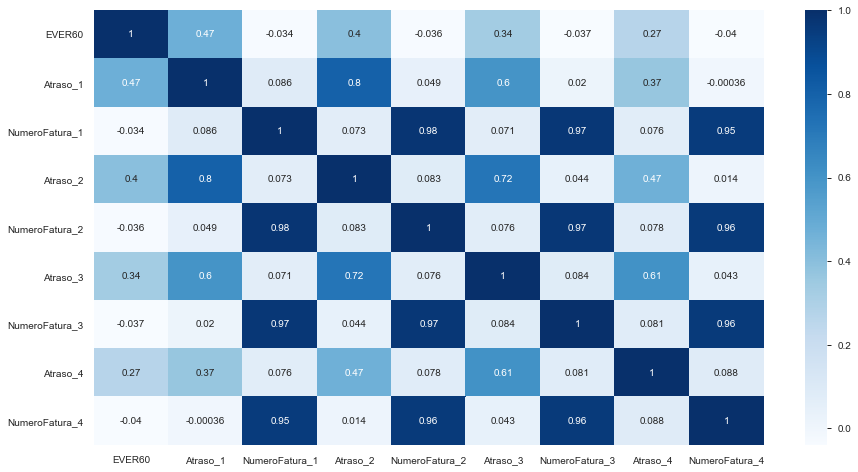

In [332]:
fig = plt.figure(figsize=(15,8))

df_cor = df_atrasos.corr()
sns.heatmap(df_cor, cmap="Blues",annot=True)

In [333]:
df_atrasos.CLIENTID.count()

3423893

In [334]:
columns_atrasos = ['Atraso_1', 
                           'Atraso_2',
                           'Atraso_3',
                           'Atraso_4', 'ClientId']
df_atrasos = df_atrasos[columns_atrasos]

# 5. Variaveis Limite e Saldo

In [336]:
df_limite_saldo.columns

Index(['ClientId', 'M0', 'SALDO_CRED_DISP_M_4', 'SALDO_CRED_DISP_M_3',
       'SALDO_CRED_DISP_M_2', 'SALDO_CRED_DISP_M_1'],
      dtype='object')

In [337]:
df_limite_saldo.head()

ClientId          M0  SALDO_CRED_DISP_M_4  SALDO_CRED_DISP_M_3  \
0       57  2019-05-24             13629.60               951.32   
1       57  2019-06-21               951.32              2662.69   
2       57  2019-07-19              2662.69             15110.13   
3       57  2019-08-23             15110.13              2166.92   
4       57  2019-09-20              2166.92              4284.49   

   SALDO_CRED_DISP_M_2  SALDO_CRED_DISP_M_1  
0              2662.69             15110.13  
1             15110.13              2166.92  
2              2166.92              4284.49  
3              4284.49                45.70  
4                45.70              1574.65

# 6. Dataset final

In [479]:
df_atrasos.columns

Index(['ClientId', 'DataReferencia_1', 'Atraso_1', 'Data1Fatura_1',
       'NumeroFatura_1', 'DataReferencia_2', 'Atraso_2', 'Data1Fatura_2',
       'NumeroFatura_2', 'DataReferencia_3', 'Atraso_3', 'DataFatura_3',
       'NumeroFatura_3', 'DataReferencia_4', 'Atraso_4', 'DataFatura_4',
       'NumeroFatura_4'],
      dtype='object')

In [604]:
# PUBLICO
df_publico = pd.read_csv('../data/interim/publico_modelo_bhv.csv')
df_publico = df_publico[['CLIENTID', 'M0','EVER60']]
df_publico.dropna(subset=['CLIENTID', 'M0','EVER60'], inplace = True)
df_publico['CLIENTID'] = df_publico['CLIENTID'].astype(str)
publico  = df_publico['CLIENTID'].unique()

In [606]:
# df_publico.count()

In [592]:
# TRANSACIONAIS
df1_transacionais = pd.read_csv('../data/raw/m0_maio/variaveis_transacionais.csv')
df2_transacionais = pd.read_csv('../data/raw/m0_junho/variaveis_transacionais.csv')
df3_transacionais = pd.read_csv('../data/raw/m0_julho/variaveis_transacionais.csv')
df4_transacionais = pd.read_csv('../data/raw/m0_agosto/variaveis_transacionais.csv')
df5_transacionais = pd.read_csv('../data/raw/m0_setembro/variaveis_transacionais.csv')

df_transacionais = pd.concat([df1_transacionais, df2_transacionais, df3_transacionais, df4_transacionais, df5_transacionais])
df_transacionais['ClientId'] = df_transacionais['ClientId'].astype(str)
df_transacionais = df_transacionais[df_transacionais['ClientId'].isin(publico)]

## CADASTRAIS
df_cadastrais = pd.read_csv('../data/raw/variaveis_bureau.csv')
df_cadastrais.dropna(subset=['ClientId'], inplace = True)
df_cadastrais['ClientId'] = df_cadastrais['ClientId'].astype(str)
df_cadastrais = df_cadastrais[df_cadastrais['ClientId'].isin(publico)]

## ATRASOS
df1_atrasos = pd.read_csv('../data/raw/m0_maio/variaveis_atrasos.csv')
df2_atrasos = pd.read_csv('../data/raw/m0_junho/variaveis_atrasos.csv')
df3_atrasos = pd.read_csv('../data/raw/m0_julho/variaveis_atrasos.csv')
df4_atrasos = pd.read_csv('../data/raw/m0_agosto/variaveis_atrasos.csv')
df5_atrasos = pd.read_csv('../data/raw/m0_setembro/variaveis_atrasos.csv')
df_atrasos = pd.concat([df1_atrasos, df2_atrasos, df3_atrasos, df4_atrasos, df5_atrasos])

df_atrasos.dropna(subset=['ClientId'], inplace = True)
df_atrasos['ClientId'] = df_atrasos['ClientId'].astype(str)
df_atrasos = df_atrasos[df_atrasos['ClientId'].isin(publico)]

## LIMITE E SALDO
df_limite_saldo = pd.read_csv('../data/interim/variaveis_saldo_credito2.csv')
df_limite_saldo['ClientId'] = df_limite_saldo['ClientId'].astype(int)
df_limite_saldo['ClientId'] = df_limite_saldo['ClientId'].astype(str)
df_limite_saldo = df_limite_saldo[df_limite_saldo['ClientId'].isin(publico)]

In [593]:
columns_transacionais_to_keep = ['ClientId','M0',
                                 'VALUE_ACCOUNT_CREDIT_INFLOW','VALUE_NOT_CATEGORIZED_INFLOW','VALUE_INVOICE_PAYMENT_INFLOW','VALUE_INSTALLMENT_PAYMENT_INFLOW','VALUE_GIFTS_INFLOW','VALUE_RECEIPTS_INFLOW','VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW','VALUE_BARS_RESTAURANTS_OUTFLOW','VALUE_PERSONAL_CARE_OUTFLOW','VALUE_SEND_OUTFLOW','VALUE_RECREATION_OUTFLOW','VALUE_MARKETPLACE_OUTFLOW','VALUE_HOME_RENT_OUTFLOW','VALUE_NOT_CATEGORIZED_OUTFLOW','VALUE_OTHERS_OUTFLOW','VALUE_INVOICE_PAYMENT_OUTFLOW','VALUE_HEALTH_OUTFLOW','VALUE_TRANSPORTATION','VALUE_CLOTHES_OUTFLOW','PARCELING_REMAINING_VALUE','PARCELING_COUNT_NOT_PAID_YET','VALUE_PRODUCT_CARD_OUTFLOW','VALUE_PRODUCT_CREDIT_CARD_OUTFLOW','VALUE_PRODUCT_TAXES_OUTFLOW','VALUE_PRODUCT_OBJECTIVES_OUTFLOW','VALUE_PRODUCT_OTHERS_OUTFLOW','VALUE_PRODUCT_BILLET_INFLOW','VALUE_PRODUCT_CREDIT_CARD_INFLOW','VALUE_PRODUCT_OBJECTIVES_INFLOW','VALUE_PRODUCT_INVOICE_INFLOW','VALUE_PRODUCT_TED_TRANSFER_INFLOW','COUNT_SUBSCRIPTIONS_SERVICES','COUNT_BARS_RESTAURANTS','COUNT_ACCOUNT_CREDIT','COUNT_PERSONAL_CARE','COUNT_SEND','COUNT_RECREATION','COUNT_MARKETPLACE','COUNT_HOME_RENT','COUNT_NOT_CATEGORIZED','COUNT_OTHERS','COUNT_INVOICE_PAYMENT','COUNT_INSTALLMENT_PAYMENT','COUNT_GIFTS','COUNT_RECEIPTS','COUNT_HEALTH','COUNT_SERVICE_CHARGE','COUNT_TRANSPORTATION','COUNT_CLOTHES_OUTFLOW',
                                 'PARCELING_LONGEST_DEADLINE']
columns_cadastrais_to_keep = ['ClientId', 
                              'SKProductFirstTransaction','Platform','Device','InstallSource','AddressState','FlagInvitedUser','FlagEmployee','PossuiVeiculo','DeclaredIncome','StartDepositValue','Renda']
columns_atrasos_to_keep = ['ClientId',
                           'Atraso_1', 'Atraso_2','Atraso_3','Atraso_4']
columns_limite_saldo_to_keep = ['ClientId', 'M0', 
                                'SALDO_CRED_DISP_M_4', 'SALDO_CRED_DISP_M_3','SALDO_CRED_DISP_M_2', 'SALDO_CRED_DISP_M_1']

In [594]:
df_transacionais = df_transacionais[columns_transacionais_to_keep]
df_transacionais.drop_duplicates(inplace = True)

df_cadastrais = df_cadastrais[columns_cadastrais_to_keep]
columns_cadastrais_to_keep = ['SKProductFirstTransaction','Platform','Device','InstallSource','AddressState','FlagInvitedUser','FlagEmployee','PossuiVeiculo','DeclaredIncome','StartDepositValue','Renda']
df_cadastrais = df_cadastrais.groupby('ClientId')[columns_cadastrais_to_keep].first().reset_index()
df_cadastrais.drop_duplicates(inplace = True)

df_atrasos = df_atrasos[columns_atrasos_to_keep]
df_atrasos.drop_duplicates(inplace = True)

df_limite_saldo = df_limite_saldo[columns_limite_saldo_to_keep]
df_limite_saldo.drop_duplicates(inplace = True)

In [595]:
len(df_publico), len(df_transacionais), len(df_cadastrais), len(df_atrasos), len(df_limite_saldo)

(599238, 567388, 115777, 429428, 426170)

In [596]:
df = df_publico[['CLIENTID', 'EVER60', 'M0']].merge(df_transacionais, 
                                                    how='left', 
                                                    left_on =['CLIENTID', 'M0'], 
                                                    right_on =['ClientId', 'M0'])
df.drop(columns=['ClientId'], inplace=True)
df.drop_duplicates(inplace = True)
column_values1 = df_publico[['CLIENTID','M0']].values
column_values2 = df[['CLIENTID','M0']].values
print(len(column_values), len(column_values2))

599238 599238


In [597]:
df = df.merge(df_cadastrais, 
              how='left', 
              left_on =['CLIENTID'], 
              right_on =['ClientId'])
df.drop(columns=['ClientId'], inplace=True)
df.drop_duplicates(inplace = True)
column_values1 = df_publico[['CLIENTID','M0']].values
column_values2 = df[['CLIENTID','M0']].values
print(len(column_values), len(column_values2))

599238 599238


In [598]:
# columns_cadastrais = columns_cadastrais_categ + columns_cadastrais_int + columns_cadastrais_float
# df[df.CLIENTID=='151373'].groupby(['CLIENTID','M0'])[columns_cadastrais].first()

# df.groupby(['CLIENTID','M0'])['Device'].count().reset_index(name='count').sort_values(['count'], ascending=False)
# df[df.CLIENTID=='1232001'][['CLIENTID', 'M0' ,'Platform']]
# df[df.CLIENTID=='1427168'].to_excel('analisar.xlsx')

In [599]:
# df = df.merge(df_atrasos, 
#               how='left', 
#               left_on =['CLIENTID'], 
#               right_on =['ClientId'])
# df.drop(columns=['ClientId'], inplace=True)
# df.drop_duplicates(inplace = True)
# column_values1 = df_publico[['CLIENTID','M0']].values
# column_values2 = df[['CLIENTID','M0']].values
# print(len(column_values), len(column_values2))

In [600]:
df = df.merge(df_limite_saldo, 
              how='left', 
              left_on =['CLIENTID', 'M0'], 
              right_on =['ClientId', 'M0'])
df.drop(columns=['ClientId'], inplace=True)
df.drop_duplicates(inplace = True)
column_values1 = df_publico[['CLIENTID','M0']].values
column_values2 = df[['CLIENTID','M0']].values
print(len(column_values), len(column_values2))

599238 599238


In [601]:
df.columns

Index(['CLIENTID', 'EVER60', 'M0', 'VALUE_ACCOUNT_CREDIT_INFLOW',
       'VALUE_NOT_CATEGORIZED_INFLOW', 'VALUE_INVOICE_PAYMENT_INFLOW',
       'VALUE_INSTALLMENT_PAYMENT_INFLOW', 'VALUE_GIFTS_INFLOW',
       'VALUE_RECEIPTS_INFLOW', 'VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW',
       'VALUE_BARS_RESTAURANTS_OUTFLOW', 'VALUE_PERSONAL_CARE_OUTFLOW',
       'VALUE_SEND_OUTFLOW', 'VALUE_RECREATION_OUTFLOW',
       'VALUE_MARKETPLACE_OUTFLOW', 'VALUE_HOME_RENT_OUTFLOW',
       'VALUE_NOT_CATEGORIZED_OUTFLOW', 'VALUE_OTHERS_OUTFLOW',
       'VALUE_INVOICE_PAYMENT_OUTFLOW', 'VALUE_HEALTH_OUTFLOW',
       'VALUE_TRANSPORTATION', 'VALUE_CLOTHES_OUTFLOW',
       'PARCELING_REMAINING_VALUE', 'PARCELING_COUNT_NOT_PAID_YET',
       'VALUE_PRODUCT_CARD_OUTFLOW', 'VALUE_PRODUCT_CREDIT_CARD_OUTFLOW',
       'VALUE_PRODUCT_TAXES_OUTFLOW', 'VALUE_PRODUCT_OBJECTIVES_OUTFLOW',
       'VALUE_PRODUCT_OTHERS_OUTFLOW', 'VALUE_PRODUCT_BILLET_INFLOW',
       'VALUE_PRODUCT_CREDIT_CARD_INFLOW', 'VALUE_PRODUCT_OBJECT

## Save Data

In [602]:
df.to_csv('../data/interim/out1.csv', index =False)

In [603]:
df.count()

CLIENTID                        599238
EVER60                          599238
M0                              599238
VALUE_ACCOUNT_CREDIT_INFLOW          0
VALUE_NOT_CATEGORIZED_INFLOW         0
                                 ...  
Renda                           389220
SALDO_CRED_DISP_M_4             426170
SALDO_CRED_DISP_M_3             426170
SALDO_CRED_DISP_M_2             426170
SALDO_CRED_DISP_M_1             426170
Length: 68, dtype: int64